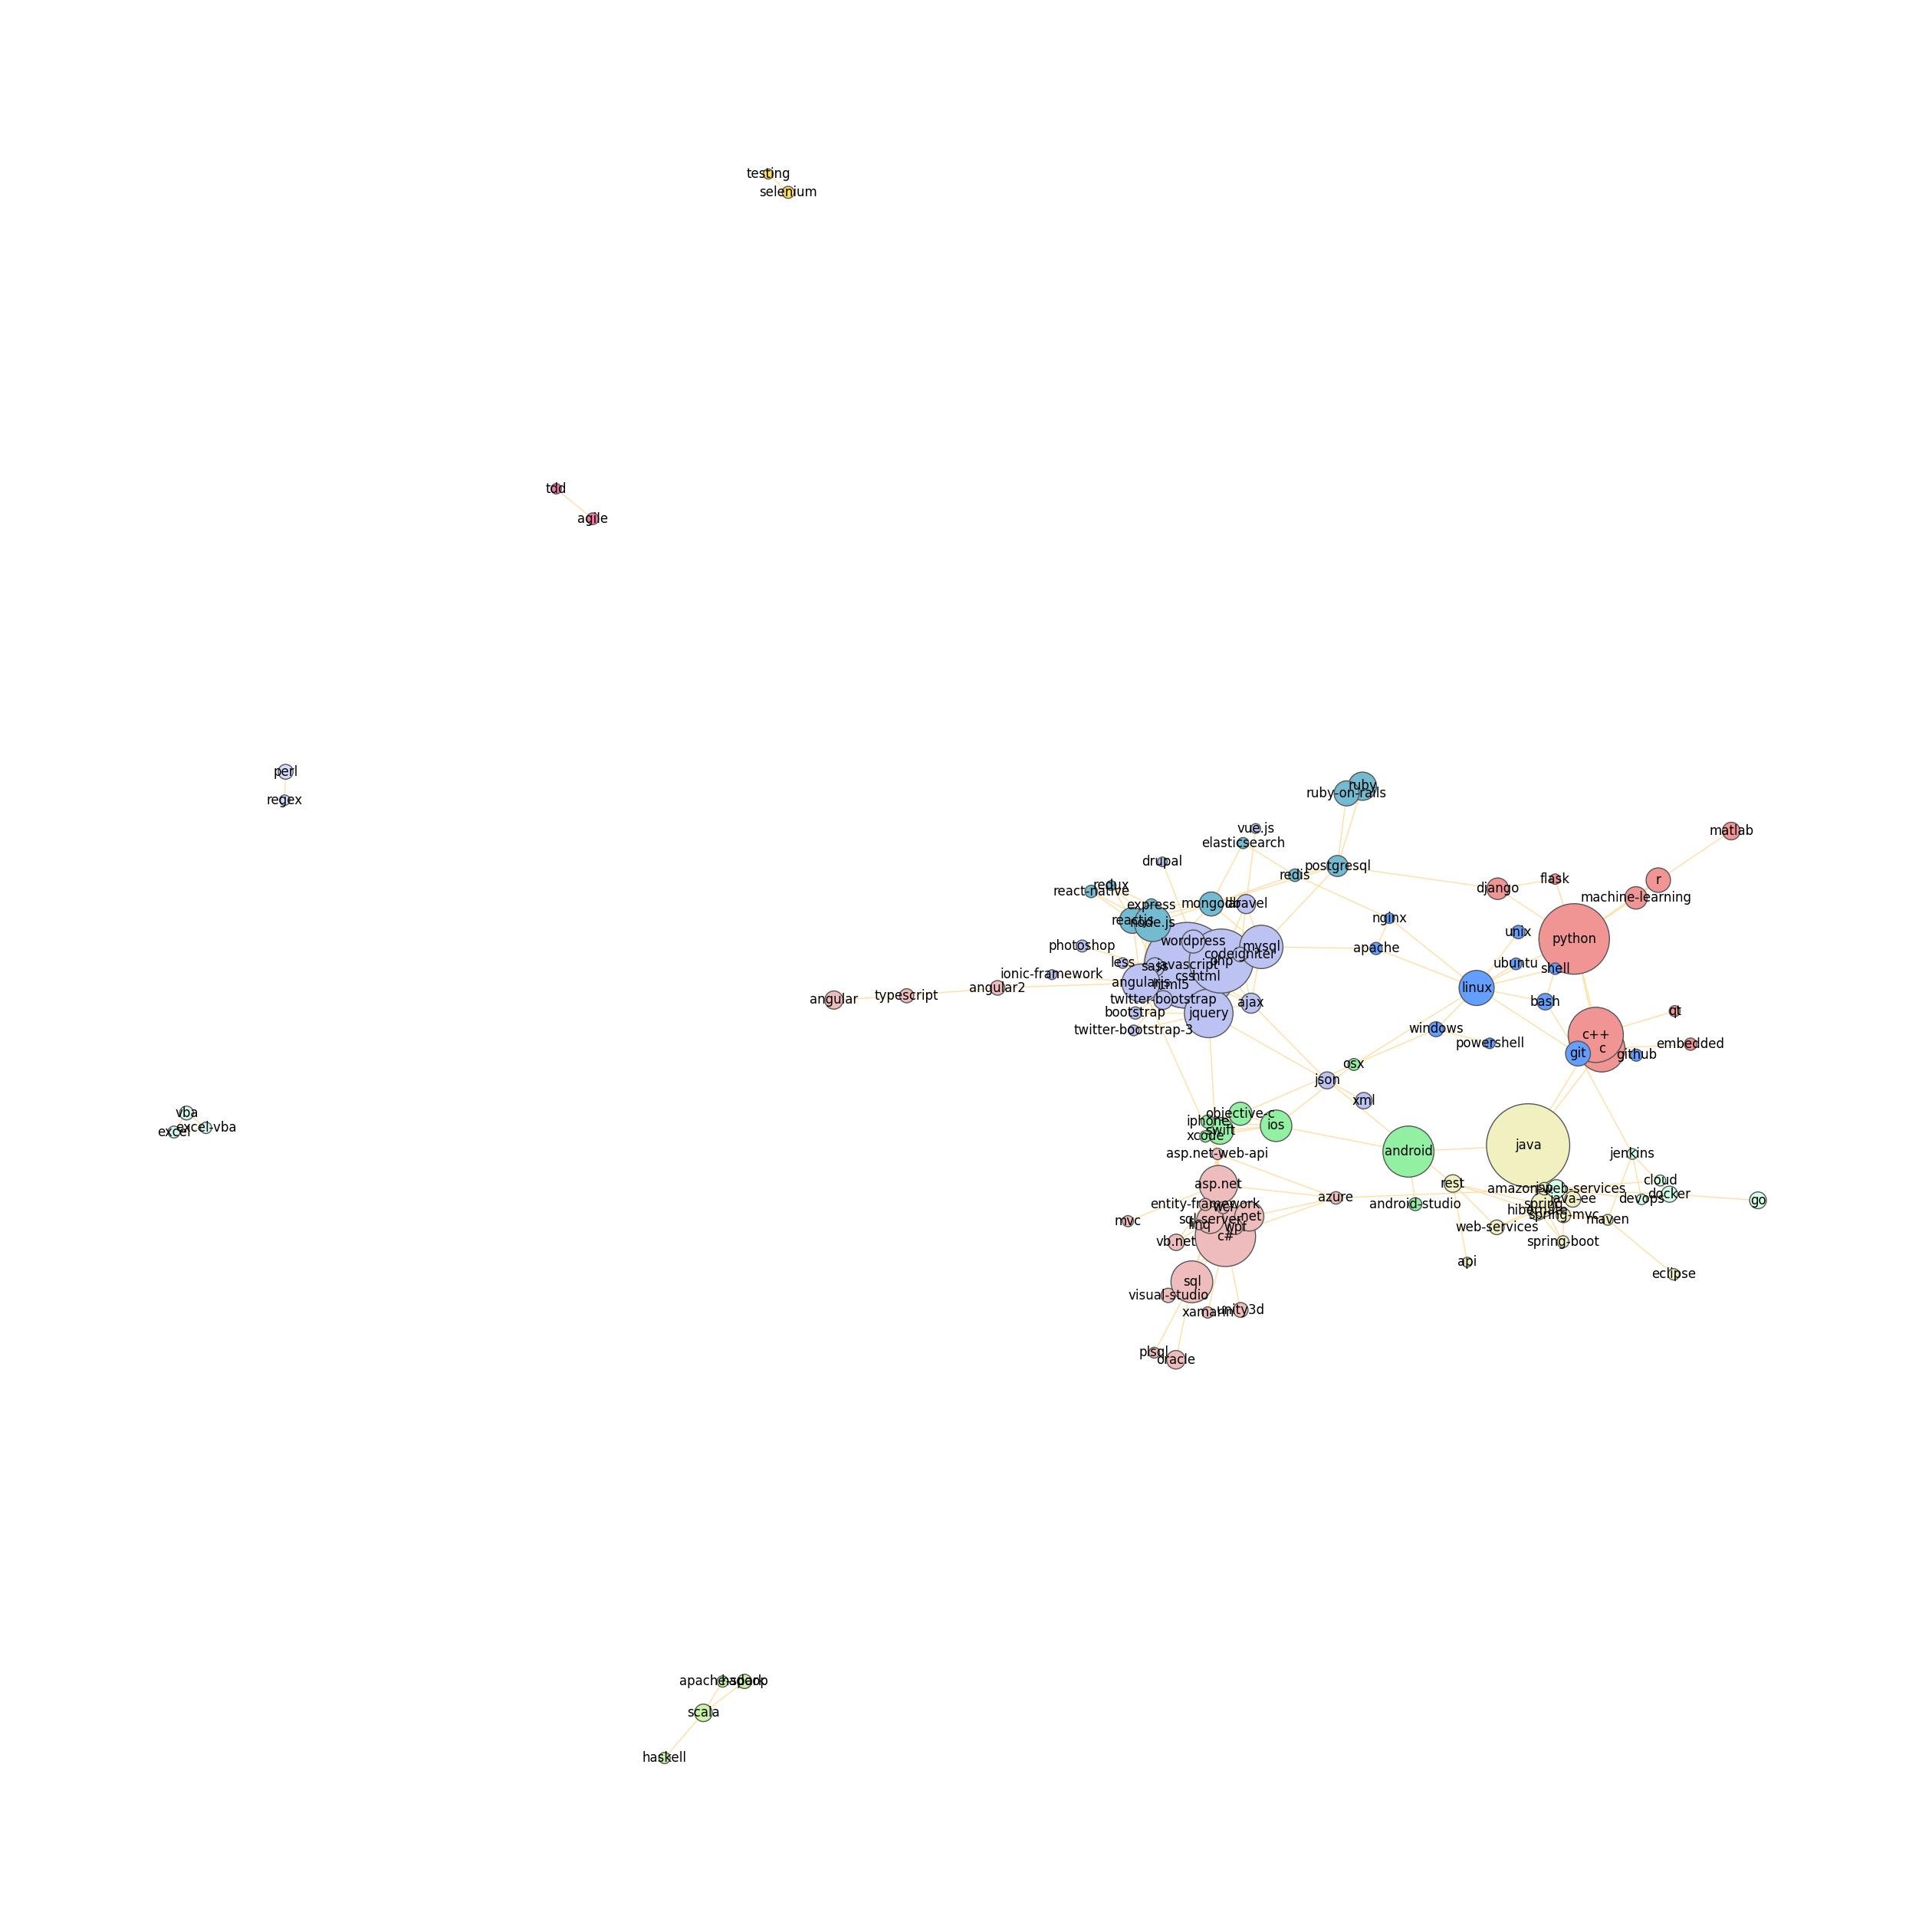

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

# Creating the graph
G = nx.Graph(day="Stackoverflow")

# Loading data
df_nodes = pd.read_csv('stack_network_nodes.csv')
df_edges = pd.read_csv('stack_network_links.csv')

# Adding nodes with attributes
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
# Adding edges with weights
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])

# Defining color map based on groups
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

# Setting plot size
plt.figure(figsize=(25,25))

# Graph options
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

# Creating color and size lists for the nodes
colors = [color_map[G.nodes[node]['group']] for node in G]
sizes = [G.nodes[node]['nodesize']*10 for node in G]

# Drawing the graph using spring layout
nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)

# Setting edge colors
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 

# Showing the plot
plt.show()
